# PCA through Singular Value Decomposition

In [1]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.cov(X)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
Xi1 = np.dot(u1, X)   # coordinates along 1st principal component
Xi2 = np.dot(u2, X)   # coordinates along 2nd principal component

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
Xapprox = u1[:,None] * Xi1   # rank-1 approximation (1st PC only)
print(Xapprox)

# Check that you got the original
Xreconstruct = u1[:,None] * Xi1 + u2[:,None] * Xi2
print(Xreconstruct)


[[ 1.89625816  1.33223972 -0.        ]
 [ 4.04859008  2.84438724 -0.        ]]
[[ 2.  1. -0.]
 [ 4.  3.  0.]]


# PCA on Iris data

In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

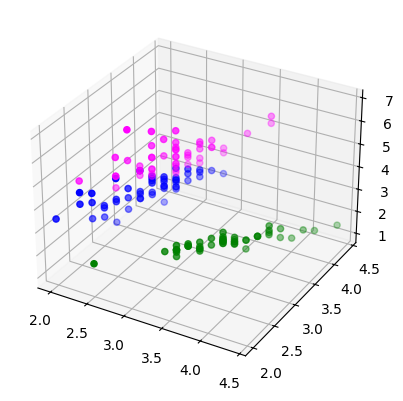

In [3]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


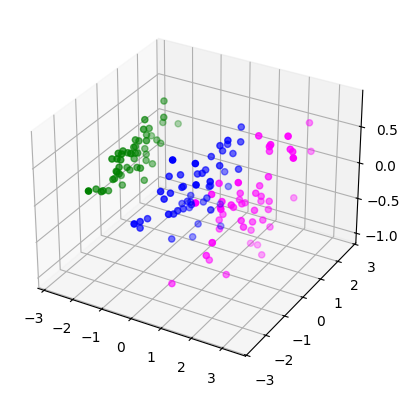

In [4]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show()


In [5]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [6]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

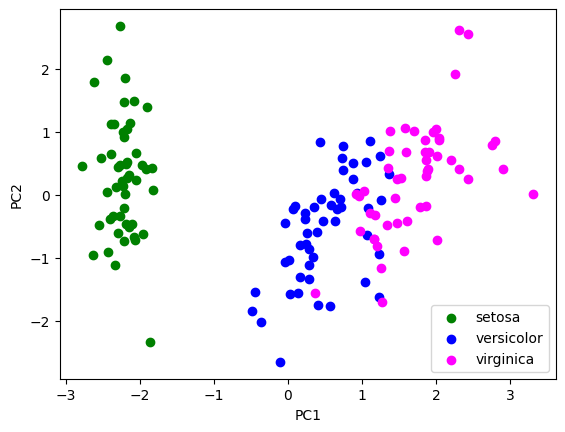

In [7]:
# Plot the principal components in 2D, mark different targets in color
plt.figure()
plt.scatter(Xpca[y==0,0], Xpca[y==0,1], color='green',   label=iris.target_names[0])
plt.scatter(Xpca[y==1,0], Xpca[y==1,1], color='blue',    label=iris.target_names[1])
plt.scatter(Xpca[y==2,0], Xpca[y==2,1], color='magenta', label=iris.target_names[2])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


# KNN classifier

(105, 4)
(45, 4)


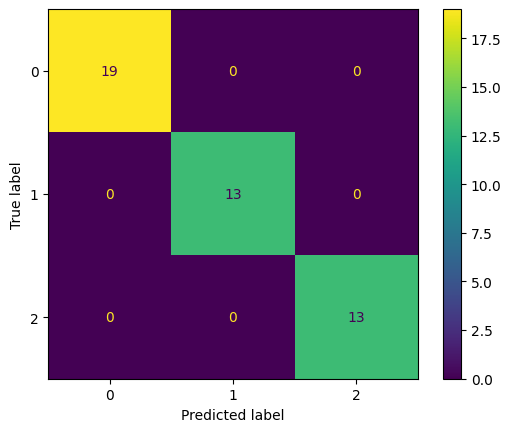

In [8]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
print(Xtrain.shape)
print(Xtest.shape)

from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(Xtrain, ytrain)
Ypred=knn1.predict(Xtest)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(ytest, Ypred)
ConfusionMatrixDisplay.from_predictions(ytest, Ypred)



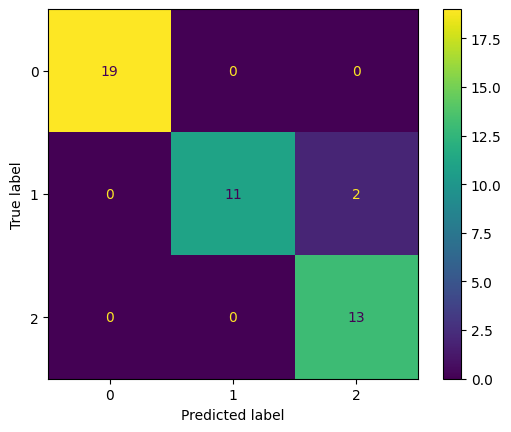

In [9]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
Xpca2 = Xpca[:, :2]   # keep only the first 2 principal components
Xtrain_pca, Xtest_pca, ytrain_pca, ytest_pca = train_test_split(Xpca2, y, test_size=0.3, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(Xtrain_pca, ytrain_pca)
Ypred_pca = knn2.predict(Xtest_pca)

confusion_matrix(ytest_pca, Ypred_pca)
ConfusionMatrixDisplay.from_predictions(ytest_pca, Ypred_pca)


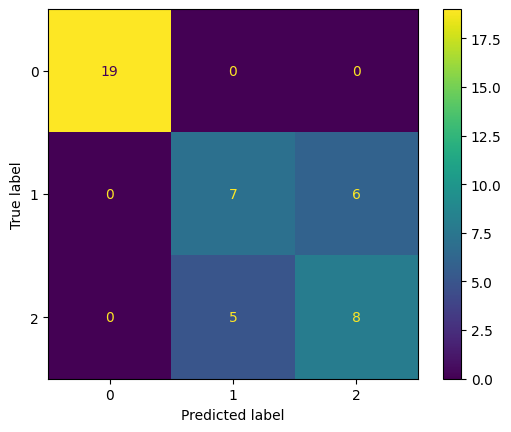

In [10]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X2col = X[:, :2]   # sepal length & sepal width only
Xtrain_2col, Xtest_2col, ytrain_2col, ytest_2col = train_test_split(X2col, y, test_size=0.3, random_state=42)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(Xtrain_2col, ytrain_2col)
Ypred_2col = knn3.predict(Xtest_2col)

confusion_matrix(ytest_2col, Ypred_2col)
ConfusionMatrixDisplay.from_predictions(ytest_2col, Ypred_2col)
